# [Project1] 

# 서울특별시_코로나19 백신 예방접종 현황

 # 프로젝트 목표
 
  -서울시 코로나19 백신 예방접종 현황 데이터를 분석하여 유의미한 정보 도출
  -탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

# 프로젝트 목차

1. 데이터 읽기: 코로나 데이터를 불러오고 Dataframe 구조를 확인
    
    1.1. 데이터 불러오기
    

2. 데이터 정제: 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제
    
    2.1. 비어있는 column 지우기
    

3. 데이터 시각화: 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악

     3.1. 예방접종일 데이터 전처리하기
     
     3.2. 데이터 확인하기
     
     3.3. 월별 코로나 1차예방접종자 현황 출력
     
     3.4. 월별 코로나 2차예방접종자 현황 출력
     
     3.5. 9월 코로나 예방접종 현황 데이터만 추출
     
     3.6. 9월 일별 1차 예방접종자 수 출력
     
     3.7. 9월 일별 2차 예방접종자 수 출력
     
     3.8. 월별 1차/ 2차접종률 데이터 그래프 분석


# 데이터 출처

     https://www.data.go.kr/data/15078073/fileData.do 


# 프로젝트 개요

        -코로나 확진자가 느는 시점에 접종자의 추세가 어떻게 되어가는지 궁금하여 
        데이터를 분석해보려고 한다. 일별 코로나 접종자 수를 확인해보면 추세를 
        확인해 볼 수 있을 것 같다.
        
        -이번 프로젝트로 서울 열린 데이터 광장에서 제공하는 '서울시 코로나19 백신 예
        방접종 현황' 데이터를 분석하고 데이터를 그래프로 나타내 상황을 직관적으로 확
        인해보려한다.
        

# 1. 데이터 읽기

        코로나 데이터를 불러오고 Dataframe 구조를 확인

# 1.1. 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.read_csv를 통하여 dataframe 형태로 읽어온다.
corona_all=pd.read_csv("./data/서울특별시 코로나19 백신 예방접종 현황.csv", encoding='euc-kr')

In [3]:
# 상위 5개 데이터를 출력한다.
corona_all.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.09.13,9575355,169036,6340285,64.4,68468,3790493,38.9
1,2021.09.12,9575355,3546,6171056,64.4,4917,3721786,38.9
2,2021.09.11,9575355,60926,6167426,64.4,40766,3716811,38.8
3,2021.09.10,9575355,123400,6105756,63.8,72243,3675621,38.4
4,2021.09.09,9575355,91416,5981858,62.5,50641,3603102,37.6


In [4]:
# dataframe 정보를 요약하여 출력한다. 
print(corona_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         146 non-null    object 
 1   접종대상자       146 non-null    int64  
 2   당일 1차접종자 수  146 non-null    int64  
 3   1차접종 누계     146 non-null    int64  
 4   1차접종률(%)    146 non-null    float64
 5   당일 2차접종자 수  146 non-null    int64  
 6   2차접종 누계     146 non-null    int64  
 7   2차접종률(%)    146 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB
None


# 2. 데이터 정제 

        비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

# 2.1. 비어있는 column 또는 쓸모 없는 데이터를 삭제 

In [5]:
# drop 함수를 사용하여 접종 대상자 coulmn 데이터를 삭제한다.
corona_del_col = corona_all.drop(columns = ['접종대상자','1차접종 누계', '2차접종 누계'])
corona_del_col

,접종일,당일 1차접종자 수,1차접종률(%),당일 2차접종자 수,2차접종률(%)
0,2021.09.13,169036,64.4,68468,38.9
1,2021.09.12,3546,64.4,4917,38.9
2,2021.09.11,60926,64.4,40766,38.8
3,2021.09.10,123400,63.8,72243,38.4
4,2021.09.09,91416,62.5,50641,37.6
...,...,...,...,...,...
141,2021.04.25,23323,34.2,3411,1.8
142,2021.04.24,200,34.2,0,1.8
143,2021.04.23,10195,33.6,119,1.8
144,2021.04.22,27074,31.0,2479,1.6


In [6]:
corona_del_col.columns = ['접종일','1차접종자수','1차접종률(%)','2차접종자수','2차접종률(%)']
corona_del_col

,접종일,1차접종자수,1차접종률(%),2차접종자수,2차접종률(%)
0,2021.09.13,169036,64.4,68468,38.9
1,2021.09.12,3546,64.4,4917,38.9
2,2021.09.11,60926,64.4,40766,38.8
3,2021.09.10,123400,63.8,72243,38.4
4,2021.09.09,91416,62.5,50641,37.6
...,...,...,...,...,...
141,2021.04.25,23323,34.2,3411,1.8
142,2021.04.24,200,34.2,0,1.8
143,2021.04.23,10195,33.6,119,1.8
144,2021.04.22,27074,31.0,2479,1.6


# 3. 데이터 시각화

        각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 
        시각화를 통하여 데이터의 특성 파악

# 3.1. 예방접종일 데이터 전처리하기

In [7]:
# 데이터 정제를 완료한 corona_del_col 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화 표현
corona_day = corona_del_col['접종일']
corona_day

0      2021.09.13
1      2021.09.12
2      2021.09.11
3      2021.09.10
4      2021.09.09
          ...    
141    2021.04.25
142    2021.04.24
143    2021.04.23
144    2021.04.22
145    2021.04.21
Name: 접종일, Length: 146, dtype: object

In [8]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언한다.
month = []
day = []

for data in corona_del_col['접종일']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장한다
    month.append(data.split('.')[1])
    day.append(data.split('.')[2])

In [9]:
corona_del_col['month'] = month
corona_del_col['day'] = day

date_month = corona_del_col['month'].astype('int64')
date_day = corona_del_col['day'].astype('int64')

date_month

0      9
1      9
2      9
3      9
4      9
      ..
141    4
142    4
143    4
144    4
145    4
Name: month, Length: 146, dtype: int64

In [10]:
date_day

0      13
1      12
2      11
3      10
4       9
       ..
141    25
142    24
143    23
144    22
145    21
Name: day, Length: 146, dtype: int64

# 3.2.데이터 확인하기

불러온 두 데이터프레임의 특정 컬럼 데이터를 중복없이 오름차순 정렬하여 확인해보기.

In [11]:
# dataframe에 month 데이터 확인
sorted(list(set(corona_del_col['month'])))

['04', '05', '06', '07', '08', '09']

In [12]:
# dataframe에 day 데이터 확인
sorted(list(set(corona_del_col['day'])))

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

# 3.3. 월별 코로나 1차예방접종자 현황 출력

In [13]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

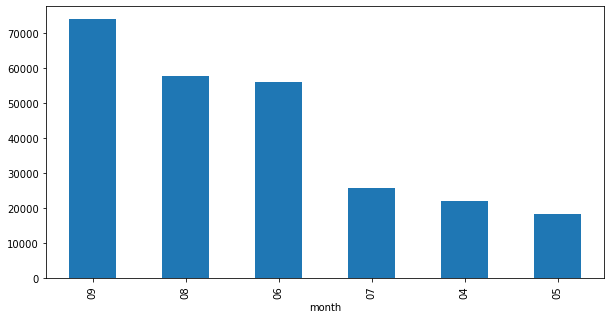

In [15]:
corona_del_col_data = corona_del_col.groupby(['month']).mean().reset_index()
corona_del_col_data = corona_del_col_data.set_index('month')
corona_del_col_data
corona_del_col_data = corona_del_col_data['1차접종자수'].sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

corona_del_col_data.plot(kind=('bar'))
plt.show()

1차 접종자 수는 9얼 > 8월 > 6월 > 7월 > 4월 > 5월 순으로 보인다.

# 3.4. 월별 코로나 2차예방접종자 현황 출력

In [16]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

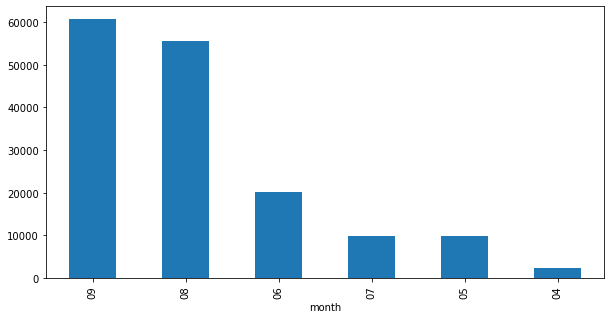

In [17]:
corona_del_col_data = corona_del_col.groupby(['month']).mean().reset_index()
corona_del_col_data
corona_del_col_data = corona_del_col_data.set_index('month')
corona_del_col_data
corona_del_col_data = corona_del_col_data['2차접종자수'].sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

corona_del_col_data.plot(kind=('bar'))
plt.show()

2차 접종자 수는 9얼 > 8월 > 6월 > 7월 > 5월 > 4월 순으로 보인다. 

# 3.5. 2021년 9월 코로나 예방접종 현황만 추출
    
    그럼 위에 결과로 가장 접종자 수가 많았던 9월 중 접종자 수가 가장 많은 날을 
    찾아보려고 한다.

In [18]:
corona_col9 = corona_del_col[corona_del_col['month']== '09']
corona_col9

,접종일,1차접종자수,1차접종률(%),2차접종자수,2차접종률(%),month,day
0,2021.09.13,169036,64.4,68468,38.9,09,13
1,2021.09.12,3546,64.4,4917,38.9,09,12
2,2021.09.11,60926,64.4,40766,38.8,09,11
3,2021.09.10,123400,63.8,72243,38.4,09,10
4,2021.09.09,91416,62.5,50641,37.6,09,09
5,2021.09.08,73677,61.5,54596,37.1,09,08
6,2021.09.07,73677,60.7,54596,36.5,09,07
7,2021.09.06,111410,59.6,80167,35.7,09,06
8,2021.09.05,145248,58.1,116052,34.5,09,05
9,2021.09.04,1388,58.0,1580,34.5,09,04


아직 9월은 끝이나지 않았으므로 가장 최근 업데이트된 13일까지만 보인다.

# 3.6. 9월 일별 1차 예방접종자 수 출력

In [19]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

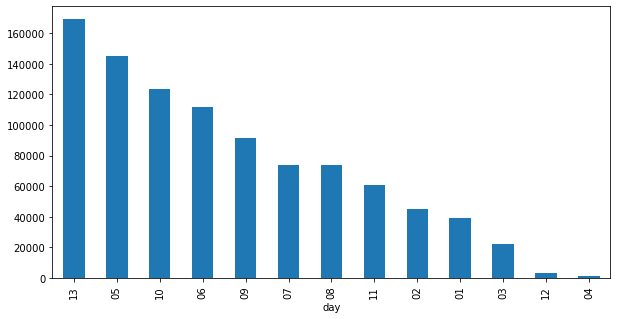

In [20]:
corona_col9_data = corona_col9.groupby(['day']).mean().reset_index()
corona_col9_data
corona_col9_data = corona_col9_data.set_index('day')
corona_col9_data

corona_col9_data_fir = corona_col9_data['1차접종자수'].sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

corona_col9_data_fir.plot(kind=('bar'))
plt.show()

In [21]:
corona_col9_data_fir.index[0]

'13'

제일 앞에 있는 인덱스를 가져와 가장 많은 접종자수가 있던 날짜를 알 수 있다.
9월 1차 접종자 수가 가장 많은 날은 13일이다.

# 3.7. 9월 일별 2차 예방접종자 수 출력

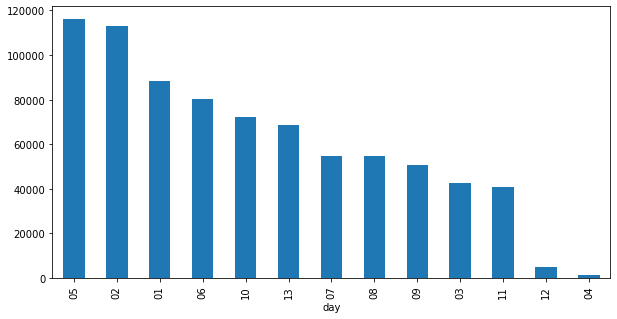

In [22]:
corona_col9_data = corona_col9.groupby(['day']).mean().reset_index()
corona_col9_data
corona_col9_data = corona_col9_data.set_index('day')
corona_col9_data

corona_col9_data_sec = corona_col9_data['2차접종자수'].sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

corona_col9_data_sec.plot(kind=('bar'))
plt.show()

In [23]:
corona_col9_data_sec.index[0]

'05'

9월 2차 접종자 수가 가장 많은 날은 5일이다.

# 3.8. 월별 1차/ 2차접종률 데이터 그래프 분석

        1차 접종과 2차 접종의 차이를 확인해보기.

In [24]:
tmp = pd.DataFrame(corona_del_col.groupby("month").mean()).reset_index()

tmp = tmp.drop(columns = ['1차접종자수','2차접종자수']).rename(columns={"1차접종률(%)":"First_inoculator(%)", "2차접종률(%)":"Second_inoculator(%)"})

tmp = tmp.set_index('month')

tmp


,First_inoculator(%),Second_inoculator(%)
month,,
04,36.440000,2.140000
05,51.435484,12.529032
06,69.240000,19.276667
07,80.232258,30.467742
08,72.509677,31.080645
09,60.723077,36.130769


<AxesSubplot:xlabel='month'>

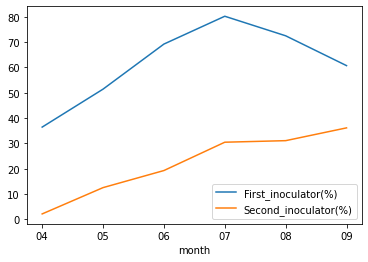

In [25]:
tmp.plot()

1차 접종 후, 2차 접종이 어느 정도의 기간 후 진행되므로 접종률의 수치 데이터를  나타낸 그래프에 확실히 보여지는 걸 볼 수 있다.

4월에 1차 접종이 시작되서 4월의 2차 접종률은 현저히 적은 수치를 보여진다. 

그리고 계속하여 1차 접종자가 일정 기간후. 2차 접종을 맞으므로 2차 접종률은 월마다 증가하는 추세를 보인다.

앞으로 1차 접종자수 늘어나다가 점점 줄어주는 추세를 보이면 많은 사람이 맞아 접종대상자가 줄어졌다는 걸 의미하는 것으로 보인다.
